# Chapter 9 - Support Vector Machines

- [Lab: 9.6.1 Support Vector Classifier](#9.6.1-Support-Vector-Classifier)
- [Lab: 9.6.2 Support Vector Machine](#9.6.2-Support-Vector-Machine)
- [Lab: 9.6.3 ROC Curves](#9.6.3-ROC-Curves)
- [Lab: 9.6.4 SVM with Multiple Classes](#9.6.4-SVM-with-Multiple-Classes)
- [Lab: 9.6.5 Application to Gene Expression Data](#9.6.5-Application-to-Gene-Expression-Data)

In [53]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report

%matplotlib inline
plt.style.use('seaborn-white')

## LAB

### 9.6.1 Support Vector Classifier

Define a function to plot a classifier with support vectors.

In [54]:
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='|', s=100, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    #plt.show()
    print('Number of support vectors: ', svc.support_.size)

Text(0, 0.5, 'X2')

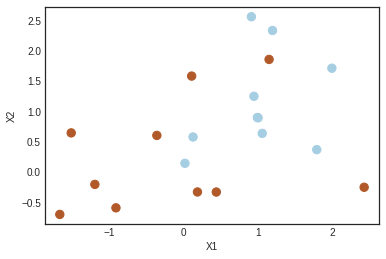

In [55]:
# Generating random data: 20 observations of 2 features and divide into two classes.
np.random.seed(5)

# Return a sample (or samples) from the “standard normal” distribution.
X = np.random.randn(20,2)
# Repeat elements of an array.
y = np.repeat([1,-1], 10)
# Increment those X1 and X2, where y=-1.
# So we moved them to the corner 
X[y == -1] = X[y == -1] +1
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

X: 
 [[ 0.44122749 -0.33087015]
 [ 2.43077119 -0.25209213]
 [ 0.10960984  1.58248112]
 [-0.9092324  -0.59163666]
 [ 0.18760323 -0.32986996]
 [-1.19276461 -0.20487651]
 [-0.35882895  0.6034716 ]
 [-1.66478853 -0.70017904]
 [ 1.15139101  1.85733101]
 [-1.51117956  0.64484751]
 [ 0.01939211  0.14314685]
 [ 0.12812082  0.57749207]
 [ 1.99643983  1.71242127]
 [ 1.05914424  0.63668912]
 [ 1.00328884  0.89406956]
 [ 1.79305332  0.36842837]
 [ 0.99380509  0.89893239]
 [ 0.94769185  1.24921766]
 [ 1.19766009  2.33484857]
 [ 0.91312439  2.56153229]]
y: 
 [ 1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


(array([[2., 2., 0., 2., 4., 0., 7., 0., 2., 1.],
        [0., 0., 2., 4., 2., 4., 3., 2., 1., 2.]]),
 array([-1.66478853, -1.24215645, -0.81952436, -0.39689228,  0.0257398 ,
         0.44837188,  0.87100396,  1.29363605,  1.71626813,  2.13890021,
         2.56153229]),
 <a list of 2 Lists of Patches objects>)

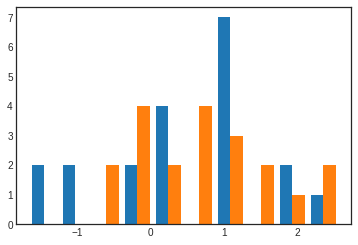

In [56]:
#X = np.random.randn(20,2)
print("X: \n", X)
print("y: \n", y)

plt.hist(X)


Number of support vectors:  13


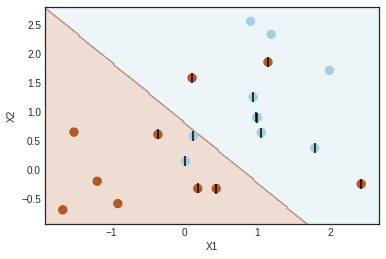

In [57]:
# Support Vector Classifier with linear kernel.
"""
C-Support Vector Classification
C=1.0 - The strength of the regularization
kernel - Specifies the kernel type to be used in the algorithm
kernels are:
  'linear', 
  'poly', 
  'rbf', 
  'sigmoid', 
  'precomputed'
max_iterint - Hard limit on iterations within solver, or -1 for no limit.
random_state (default=None) - Controls the pseudo random number generation for 
shuffling the data for probability estimates.
"""
svc = SVC(C= 1.0, kernel='linear')
# S: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
svc.fit(X, y)

plot_svc(svc, X, y)



In [58]:
# S: experiments
pad = 0.25
h = 0.2
x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

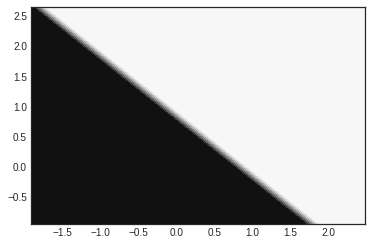

In [59]:
# S: experiments
plt.contourf(xx, yy, Z)
plt.show()

In [60]:
# S: experiments
Z.shape

(19, 23)

In [61]:
# S: experiments
Z

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1, -1, -1, -1, -1],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1, -1, -1, -1, -1, -1],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1, -1, -1, -1, -1, -1, -1],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        -1, -1, -1, -1, -1, -1, -1],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        -1, -1, -1, -1, -1, -1, -1],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1],
       [ 1,  1,  1,

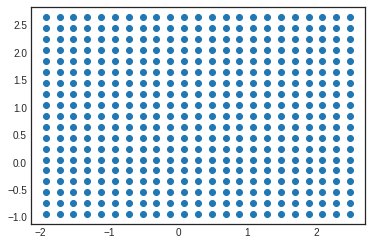

In [62]:
# S: experiments
plt.scatter(xx, yy)

/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


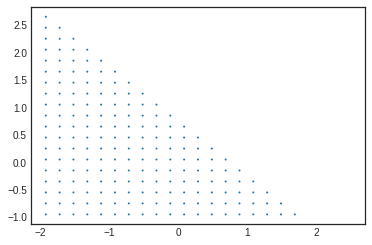

In [63]:
# S: experiments
plt.scatter(xx, yy, Z)

Number of support vectors:  16


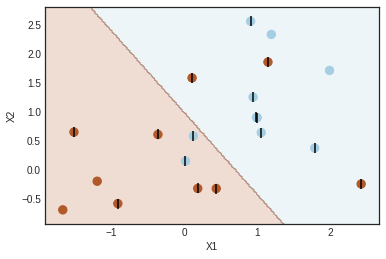

In [64]:
# When using a smaller cost parameter (C=0.1) the margin is wider, resulting in more support vectors.
svc2 = SVC(C=0.1, kernel='linear')
svc2.fit(X, y)
plot_svc(svc2, X, y)

In [65]:
# Select the optimal C parameter by cross-validation
tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}] 
# S: 'C' is a regularization parametr. The strength of the regularization is inversely proportional to C. P
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring='accuracy', return_train_score=True)
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
clf.fit(X, y)
clf.cv_results_

{'mean_fit_time': array([0.00063055, 0.0003824 , 0.00041394, 0.00041552, 0.00045092,
        0.00043638, 0.00068574]),
 'mean_score_time': array([0.00035617, 0.00027285, 0.00027065, 0.00029263, 0.00030303,
        0.00027478, 0.00035703]),
 'mean_test_score': array([0.8 , 0.8 , 0.8 , 0.75, 0.75, 0.75, 0.75]),
 'mean_train_score': array([0.79444444, 0.79444444, 0.75      , 0.77777778, 0.76666667,
        0.76666667, 0.76666667]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 5, 10, 100],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 5},
  {'C': 10},
  {'C': 100}],
 'rank_test_score': array([1, 1, 1, 4, 4, 4, 4], dtype=int32),
 'split0_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'split0_train_score': array([0.83333333, 0.83333333, 0.77777778, 0.77777778, 0.77777778,
        0.77777778, 0.77777778]),
 'split1_test_score'

In [66]:
# 0.001 is best according to GridSearchCV. 
clf.best_params_

{'C': 0.001}

In [67]:

# all method and field in clf
all_field = dir(clf)
print(all_field)

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_cache', '_abc_negative_cache', '_abc_negative_cache_version', '_abc_registry', '_check_is_fitted', '_estimator_type', '_format_results', '_get_param_names', '_get_tags', '_more_tags', '_pairwise', '_required_parameters', '_run_search', 'best_estimator_', 'best_index_', 'best_params_', 'best_score_', 'classes_', 'cv', 'cv_results_', 'decision_function', 'error_score', 'estimator', 'fit', 'get_params', 'iid', 'inverse_transform', 'multimetric_', 'n_jobs', 'n_splits_', 'param_grid', 'pre_dispatch', 'predict', 'predict_log_proba', 'predict_proba', 'refit', 'refit_time_', 'return_train_score'

In [68]:
np.random.choice([-1,1], size=20)

array([-1, -1,  1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,  1, -1,
       -1,  1, -1])

X_test:
 [[ 1.62434536 -0.61175641]
 [-0.52817175 -1.07296862]
 [ 0.86540763 -2.3015387 ]
 [ 1.74481176 -0.7612069 ]
 [ 0.3190391  -0.24937038]
 [ 1.46210794 -2.06014071]
 [-0.3224172  -0.38405435]
 [ 1.13376944 -1.09989127]
 [-0.17242821 -0.87785842]
 [ 0.04221375  0.58281521]
 [-1.10061918  1.14472371]
 [ 0.90159072  0.50249434]
 [ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]
 [-0.69166075 -0.39675353]
 [-0.6871727  -0.84520564]
 [-0.67124613 -0.0126646 ]
 [-1.11731035  0.2344157 ]
 [ 1.65980218  0.74204416]]


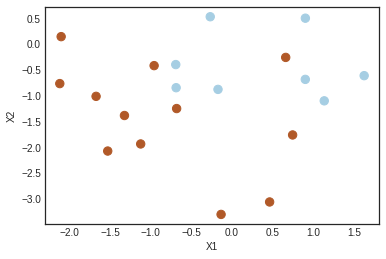

In [69]:
# Generating test data
# Метод random.seed() задает начальные условия для генератора случайных чисел. 
np.random.seed(1)
X_test = np.random.randn(20,2)
print ("X_test:\n", X_test)
# Generates a random sample from a given 1-D array
y_test = np.random.choice([-1,1], size=20)
# Move diagonally left-down all x's that correspond y=1
X_test[y_test == 1] = X_test[y_test == 1] -1

plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2');

In [70]:
# svc2 : C = 0.1
y_pred = svc2.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred),index=svc.classes_, columns=svc.classes_)

,-1,1
-1,2,6
1,0,12


In [71]:
svc3 = SVC(C=0.001, kernel='linear')
svc3.fit(X, y)

# svc3 : C = 0.001
y_pred = svc3.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index=svc3.classes_, columns=svc3.classes_)
# The misclassification is the same

,-1,1
-1,2,6
1,0,12


Number of support vectors:  20


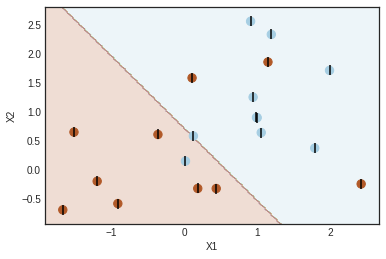

In [72]:
# Draw the above classifier painting
plot_svc(svc3, X, y)
# All points are barred. 
# C is cost or budget. 
# Here C is small. So perhaps, the bigger is C, the less support vectors we have.  

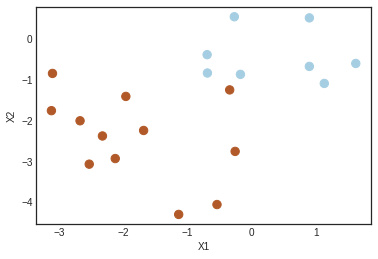

In [73]:
# Changing the test data so that the classes are really seperable with a hyperplane.
# We subtracted another 1
X_test[y_test == 1] = X_test[y_test == 1] -1
plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2');

In [74]:
svc4 = SVC(C=10.0, kernel='linear')
svc4.fit(X_test, y_test)

SVC(C=10.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Number of support vectors:  4


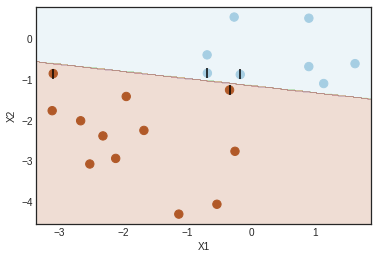

In [75]:
plot_svc(svc4, X_test, y_test)

In [76]:

# ---------------stopped here----------------
# Increase the margin. Now there is one misclassification: increased bias, lower variance.
svc5 = SVC(C=1, kernel='linear')
svc5.fit(X_test, y_test)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Number of support vectors:  5


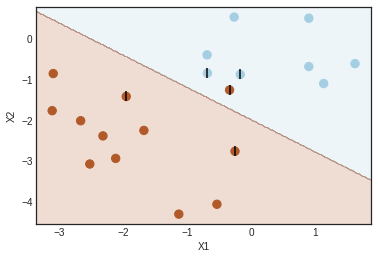

In [77]:
plot_svc(svc5, X_test, y_test)

### 9.6.2 Support Vector Machine 

In [78]:
np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

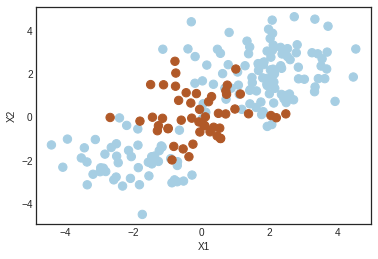

In [79]:
# Generating test data
np.random.seed(8)
X = np.random.randn(200,2)
X[:100] = X[:100] +2
X[101:150] = X[101:150] -2
y = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2');

In [80]:
svm = SVC(C=1, kernel='rbf', gamma=1)
svm.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

Number of support vectors:  51


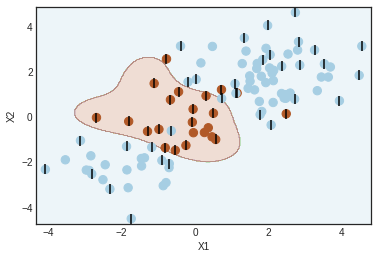

In [81]:
plot_svc(svm, X_train, y_train)

In [82]:
# Increasing C parameter, allowing more flexibility
svm2 = SVC(C=100, kernel='rbf', gamma=1.0)
svm2.fit(X_train, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Number of support vectors:  36


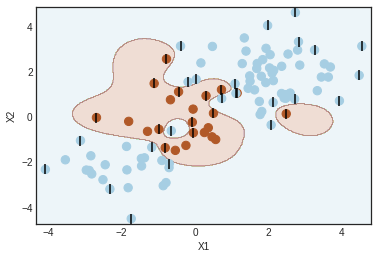

In [83]:
plot_svc(svm2, X_train, y_train)

In [84]:
# Set the parameters by cross-validation
tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100],
                     'gamma': [0.5, 1,2,3,4]}]
clf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10, scoring='accuracy', return_train_score=True)
clf.fit(X_train, y_train)
clf.cv_results_

{'mean_fit_time': array([0.00081384, 0.00062609, 0.00070333, 0.00074325, 0.00072277,
        0.0005909 , 0.00057037, 0.00062232, 0.00065587, 0.00067959,
        0.00052364, 0.00057845, 0.00068831, 0.000719  , 0.00071936,
        0.00072184, 0.00071218, 0.00072303, 0.0007616 , 0.00075181,
        0.00062604, 0.0006531 , 0.00072601, 0.00073607, 0.00073409]),
 'mean_score_time': array([0.00043964, 0.00033641, 0.00037582, 0.00038753, 0.00036893,
        0.0003386 , 0.00029037, 0.00029693, 0.00029912, 0.0003015 ,
        0.00028057, 0.00029492, 0.00030088, 0.00029669, 0.00030382,
        0.00035682, 0.00035098, 0.00029562, 0.00030556, 0.00029337,
        0.00028975, 0.00029287, 0.00029497, 0.00029888, 0.00030847]),
 'mean_test_score': array([0.77, 0.77, 0.77, 0.77, 0.77, 0.77, 0.77, 0.77, 0.77, 0.77, 0.9 ,
        0.9 , 0.88, 0.86, 0.83, 0.91, 0.87, 0.86, 0.87, 0.87, 0.86, 0.83,
        0.86, 0.88, 0.87]),
 'mean_train_score': array([0.77      , 0.77      , 0.77      , 0.77      , 0.77     

In [85]:
clf.best_params_

{'C': 10, 'gamma': 0.5}

In [86]:
confusion_matrix(y_test, clf.best_estimator_.predict(X_test))

array([[66,  7],
       [ 6, 21]])

In [87]:
# 15% of test observations misclassified
clf.best_estimator_.score(X_test, y_test)

0.87

Stopped here
### 9.6.3 ROC Curves

Comparing the ROC curves of two models on train/test data. One model is more flexible than the other.

In [88]:
svm3 = SVC(C=1, kernel='rbf', gamma=2)
svm3.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [89]:
# More flexible model
svm4 = SVC(C=1, kernel='rbf', gamma=50)
svm4.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=50, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

y_train_score3 = [-0.999979   -1.00005372 -0.40446357  0.76664429 -0.99992701 -0.89438832
 -1.00147316 -0.99970016 -1.00858884  0.62963744 -0.99981105 -0.10930331
 -1.00022136  0.85717468 -1.00021564  0.50874452  0.999865   -0.99997596
  1.00013311 -0.99976124 -0.99992581 -1.11990236 -1.05525591 -0.99960168
 -1.21106686 -1.27668142  1.01206595 -1.00020629 -0.99960255 -1.00020039
 -1.11948919 -1.01588817 -1.00702794 -1.12833305 -1.00044184 -1.00036214
 -0.99992025 -1.00041939 -1.12070023 -1.05440647 -1.06530288  1.00009328
 -1.00048317 -1.01031326  1.12014779 -1.00016288 -0.99976011 -1.00015597
  0.63095777 -0.99986649 -1.00627459  1.13285097 -1.00015749  0.58206076
  1.00007787 -0.99961238 -0.99969664 -1.04341507  1.00291904 -1.00010596
 -0.99976064 -0.99976161 -0.85726043  0.78840286 -1.19905324 -0.36967325
 -0.649554   -0.999693   -1.03163143 -0.99991219  0.12516991 -1.09385805
 -1.01177796 -0.99983737 -0.99977106 -1.02954317 -0.99988771 -0.35789335
 -1.0303812  -1.00035567  0.364054

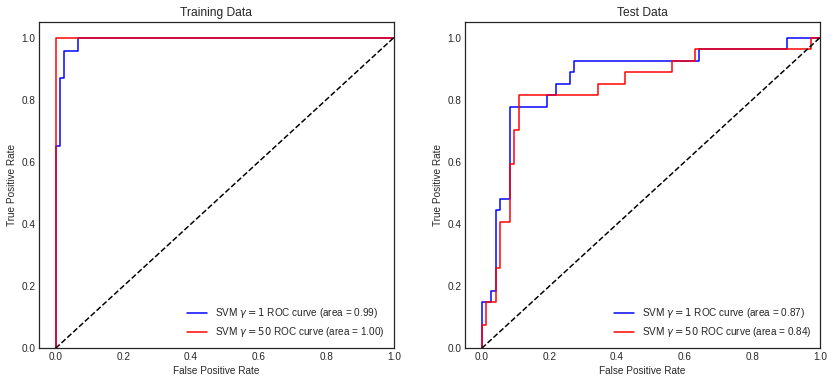

In [90]:
y_train_score3 = svm3.decision_function(X_train)
print("y_train_score3 =", y_train_score3)
from scipy.stats import pearsonr
trainCor = pearsonr(y_train, y_train_score3)
print("trainCor =", trainCor)
y_train_score4 = svm4.decision_function(X_train)

false_pos_rate3, true_pos_rate3, _ = roc_curve(y_train, y_train_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

false_pos_rate4, true_pos_rate4, _ = roc_curve(y_train, y_train_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,6))
ax1.plot(false_pos_rate3, true_pos_rate3, label='SVM $\gamma = 1$ ROC curve (area = %0.2f)' % roc_auc3, color='b')
ax1.plot(false_pos_rate4, true_pos_rate4, label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc4, color='r')
ax1.set_title('Training Data')

y_test_score3 = svm3.decision_function(X_test)
y_test_score4 = svm4.decision_function(X_test)

false_pos_rate3, true_pos_rate3, _ = roc_curve(y_test, y_test_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

false_pos_rate4, true_pos_rate4, _ = roc_curve(y_test, y_test_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

ax2.plot(false_pos_rate3, true_pos_rate3, label='SVM $\gamma = 1$ ROC curve (area = %0.2f)' % roc_auc3, color='b')
ax2.plot(false_pos_rate4, true_pos_rate4, label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc4, color='r')
ax2.set_title('Test Data')

for ax in fig.axes:
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([-0.05, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc="lower right")

In [91]:
y_train_score3

array([-0.999979  , -1.00005372, -0.40446357,  0.76664429, -0.99992701,
       -0.89438832, -1.00147316, -0.99970016, -1.00858884,  0.62963744,
       -0.99981105, -0.10930331, -1.00022136,  0.85717468, -1.00021564,
        0.50874452,  0.999865  , -0.99997596,  1.00013311, -0.99976124,
       -0.99992581, -1.11990236, -1.05525591, -0.99960168, -1.21106686,
       -1.27668142,  1.01206595, -1.00020629, -0.99960255, -1.00020039,
       -1.11948919, -1.01588817, -1.00702794, -1.12833305, -1.00044184,
       -1.00036214, -0.99992025, -1.00041939, -1.12070023, -1.05440647,
       -1.06530288,  1.00009328, -1.00048317, -1.01031326,  1.12014779,
       -1.00016288, -0.99976011, -1.00015597,  0.63095777, -0.99986649,
       -1.00627459,  1.13285097, -1.00015749,  0.58206076,  1.00007787,
       -0.99961238, -0.99969664, -1.04341507,  1.00291904, -1.00010596,
       -0.99976064, -0.99976161, -0.85726043,  0.78840286, -1.19905324,
       -0.36967325, -0.649554  , -0.999693  , -1.03163143, -0.99

In [92]:
y_test_score3

array([-0.90299301, -0.98563258,  1.12971183,  0.82476415,  1.14776902,
       -0.99717989, -0.98298411, -0.75698823, -0.9905856 , -0.98723087,
       -0.60696436, -1.00536419, -1.00248483, -0.71623937, -0.67963121,
       -0.59694268, -1.08695978, -0.62882545, -1.30370695, -1.04950904,
       -0.90447681,  1.09078897, -0.68813669, -1.00527625,  0.3229436 ,
        0.88305706, -0.89841538, -1.00605736, -0.92991047,  0.66848161,
        0.76073072, -0.94709322, -1.01895512, -1.0208965 , -1.07196414,
       -0.96764636, -1.01009256,  0.11352944, -1.08235804, -0.44579012,
       -0.91851109, -0.86059079, -0.99071563, -0.69511132, -1.18905677,
       -0.44982528, -0.99803396, -0.93151339, -1.02635543, -0.74772783,
        0.47585621,  1.10616942, -1.00750931, -0.99849733, -0.40013365,
       -0.96979224, -0.97752288, -0.96217369, -0.77561848,  0.67220061,
       -0.60279412,  0.60295232, -0.99746245, -1.00416908,  0.94838961,
       -1.00970179, -0.10446978, -0.99928569, -0.90684965, -0.87

As expected, the more flexible model scores better on training data but worse on the test data.

### 9.6.4 SVM with Multiple Classes

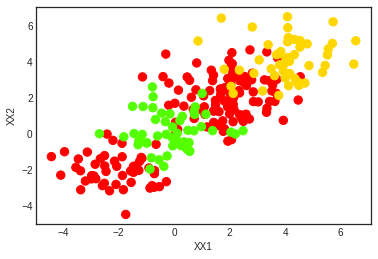

In [93]:
# Adding a third class of observations
np.random.seed(8)
XX = np.vstack([X, np.random.randn(50,2)])
yy = np.hstack([y, np.repeat(0,50)])
XX[yy ==0] = XX[yy == 0] +4

plt.scatter(XX[:,0], XX[:,1], s=70, c=yy, cmap=plt.cm.prism)
plt.xlabel('XX1')
plt.ylabel('XX2');

In [94]:
# S: exp
a = np.array([1, 1, 1])
b = np.array([2, 2, 2])
np.vstack((a, b))

array([[1, 1, 1],
       [2, 2, 2]])

In [95]:
svm5 = SVC(C=1, kernel='rbf')
svm5.fit(XX, yy)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Number of support vectors:  128


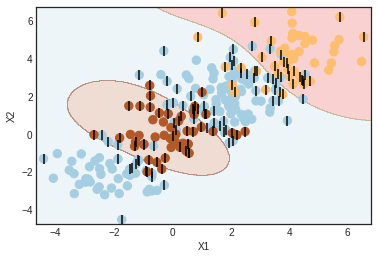

In [96]:
plot_svc(svm5, XX, yy)

### 9.6.5 Application to Gene Expression Data

In R, I exported the dataset from package 'ISLR' to csv files.

In [97]:
# X_train = pd.read_csv('Data/Khan_xtrain.csv').drop('Unnamed: 0', axis=1)
# y_train = pd.read_csv('Data/Khan_ytrain.csv').drop('Unnamed: 0', axis=1).as_matrix().ravel()
# X_test = pd.read_csv('Data/Khan_xtest.csv').drop('Unnamed: 0', axis=1)
# y_test = pd.read_csv('Data/Khan_ytest.csv').drop('Unnamed: 0', axis=1).as_matrix().ravel()

X_train = pd.read_csv('https://raw.githubusercontent.com/borisgarbuzov/schulich_data_science_1/master/Data/Khan_xtrain.csv').drop('Unnamed: 0', axis=1)
y_train = pd.read_csv('https://raw.githubusercontent.com/borisgarbuzov/schulich_data_science_1/master/Data/Khan_ytrain.csv').drop('Unnamed: 0', axis=1).values.ravel()
X_test = pd.read_csv('https://raw.githubusercontent.com/borisgarbuzov/schulich_data_science_1/master/Data/Khan_xtest.csv').drop('Unnamed: 0', axis=1)
y_test = pd.read_csv('https://raw.githubusercontent.com/borisgarbuzov/schulich_data_science_1/master/Data/Khan_ytest.csv').drop('Unnamed: 0', axis=1).values.ravel()

In [98]:
# y_train counts
pd.Series(y_train).value_counts(sort=False)

1     8
2    23
3    12
4    20
dtype: int64

In [99]:
# y_test counts
pd.Series(y_test).value_counts(sort=False)

1    3
2    6
3    6
4    5
dtype: int64

In [100]:
# This model gives identical results to the svm() of the R package e1071, also based on libsvm library.
svc = SVC(kernel='linear')

# This model is based on liblinear library and gives 100 score on the test data. 
#svc = LinearSVC()

svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [101]:
cm = confusion_matrix(y_train, svc.predict(X_train))
cm_df = pd.DataFrame(cm.T, index=svc.classes_, columns=svc.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)

True       1   2   3   4
Predicted               
1          8   0   0   0
2          0  23   0   0
3          0   0  12   0
4          0   0   0  20


In [102]:
cm = confusion_matrix(y_test, svc.predict(X_test))
cm_df = pd.DataFrame(cm.T, index=svc.classes_, columns=svc.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)

True       1  2  3  4
Predicted            
1          3  0  0  0
2          0  6  2  0
3          0  0  4  0
4          0  0  0  5
